This block contains comments as markdown code
# **Chapter 1**  
**ATMOS 5340: Environmental Programming and Statistics**  
**John Horel **

- Follow  these directions for doing these steps using a linux terminal window
- are you in your atmos_5340/chapter1 directory?
- check the directory you are in: pwd
- If not in that directory, then type: cd 
- And then type: cd atmos_5340/chapter1
- Type the following (Note the dot after the space): cp ~u0035056/atmos_5340_2022/chapter1/* . 
- Have you already copied the data directory? If not, you'll need to do that too. Review the instructions for that



# Using Python modules

`numpy` provides routines to handle arrays and many calculations efficiently and is imported by convention as `np`. Numpy functions are very good at handling homogeneous data arrays (and similar in that respect to matlab functions).

`pandas` is really good at handling tabular/array data that may have heterogeneous types (floating and text, for example). It is imported by convention as `pd`. 

There are a couple sets of panda library routines  (`Series`, and `DataFrame`) used so frequently that we'll import those directly too.

`scipy` has a bunch of statistical functions and we'll import `stats` from `scipy`


`pyplot` is a _submodule_ of matplotlib. It is typically imported as the alias `plt` to handle basic plotting

In [1]:
# these are python modules used in the program
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

Alta snowfall
https://utahavalanchecenter.org/alta-monthly-snowfall


Look in the `data` folder at the called `alta_snow.csv`

Open the `alta_snow.csv` file see the column contents and the units.

- The 0th column is the Year at Season End
- The 1st-6th column are the total snowfall in each month from November to April (in inches)
- The 7th column is the Nov-Apr total snowfall (inches)

Begins in the 1946 season and ends in 2022

In [2]:
#read the year of the Alta snowfall data
year = np.genfromtxt('../data/alta_snow.csv', delimiter=',',usecols=0,skip_header = 1)
print(year)
#read the seasonal total and convert from inches to cm
snow = 2.54  * np.genfromtxt('../data/alta_snow.csv', delimiter=',', usecols=7, skip_header=1)
#print out the data after converting it to cm
print(snow)
#what are the min and max values?
print("Min: %.1f Max: %.1f" % (np.min(snow),np.max(snow)))

[1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957.
 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017.
 2018. 2019. 2020. 2021. 2022.]
[1145.54   949.96  1394.46  1328.42  1211.58   886.46  1628.14  1043.94
  972.82  1198.88  1168.4    980.44  1421.13   980.44  1004.57   828.04
 1019.81  1018.54  1437.64  1455.42  1099.82  1381.76  1217.93  1437.894
 1165.86  1223.01  1185.164 1261.11  1512.824 1536.7   1116.33   798.83
 1332.23  1239.52  1305.56   993.14  1767.84  1617.98  1888.49  1160.78
 1521.46   969.772 1042.162 1477.01  1137.92  1473.708 1003.3   1652.016
 1245.362 1893.316 1427.48  1521.714 1460.246 1164.336 1132.84  1193.038
 1441.958 1014.476 1449

In [3]:
#use pandas module to organize the data in a convenient manner
#by default the pandas display format shows up to 5 places to the right of the decimal point, limit it to 1
#this next line is really obtuse, so don't stress over what it means
pd.set_option('display.float_format', lambda x: '%.1f' % x)
#define a dataframe, df, from the snow organized by year
df = pd.DataFrame(snow, index=year.astype(int),columns=['Alta Snow (cm)'])
#list out the content of the dataframe
df

Alta Snow (cm)
1946          1145.5
1947           950.0
1948          1394.5
1949          1328.4
1950          1211.6
...              ...
2018           731.5
2019          1206.5
2020          1056.6
2021           950.0
2022           717.3

[77 rows x 1 columns]

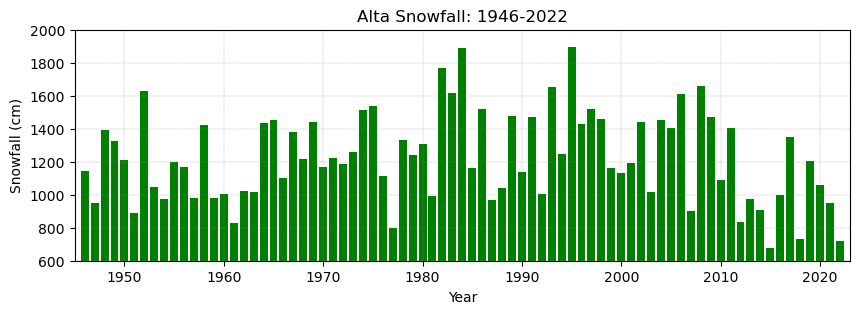

In [4]:
#Create bar plot time series of Alta seasonal snowfall
#create a list for the times for tick marks on the x axis. This will stop at 2020 (not 2030)
decade_ticks = np.arange(1950,2030,10)

#create a fig of Alta snowfall time series
fig,(ax1) = plt.subplots(1,1,figsize=(10,3))
ax1.bar(year,snow,color='green')
ax1.set(xlim=(1945,2023),ylim=(600,2000))
ax1.set(xlabel="Year",ylabel="Snowfall (cm)")
ax1.set(xticks=decade_ticks)
ax1.set(title="Alta Snowfall: 1946-2022")
#add grids to the plot
ax1.grid(linestyle='--', color='grey', linewidth=.2)

#save the figure to 
plt.savefig('alta_snowfall.png')

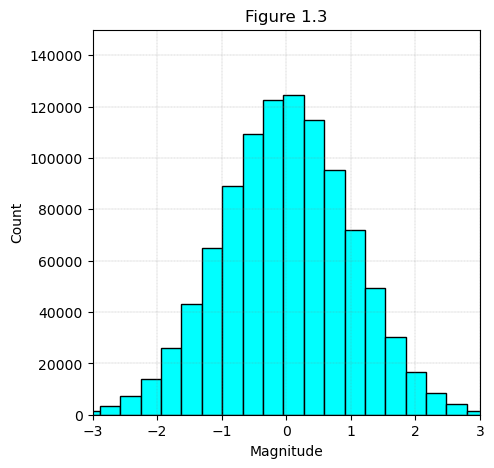

In [5]:
#generate a Gaussian type empirical distribution for figure 1.3
from numpy.random import normal
sample = normal(loc=0, scale=1, size=1000000)
# plot the histogram
fig,(ax1) = plt.subplots(1,1,figsize=(5,5))
ax1.hist(sample, bins=31, color='cyan',edgecolor='black',linewidth=1,align='mid')
ax1.set(xlim=(-3,3),ylim=(0,150000))
ax1.set(xlabel="Magnitude",ylabel="Count")
ax1.set(title="Figure 1.3")
#add grids to the plot
ax1.grid(linestyle='--', color='grey', linewidth=.2)
#save the figure to 
plt.savefig('figure_1.3.png')
